<a href="https://colab.research.google.com/github/akhich551995/my_first_repository-akhil/blob/master/GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
gps= pd.read_csv('/content/drive/My Drive/Colab Notebooks/google play store/googleplaystore.csv')


In [ ]:
#gps.describe()
#gps.columns
#gps.head(5)
#gps.tail(5)
gps.info()
#gps.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Google play store data has 13 columns with dtypes:float64(1), object(12)
dimension of the data is 10841*13



1.   Apps are divided into different categories
2.   we have multiple columns containing numeric data, they have non numeric data type. this causes problems with data processing.




# Data Preprocessing


Lets find out no of unique apps and unique categories in the data set.

In [ ]:
unique_apps= len(gps["App"].unique())
unique_cat= len(gps["Category"].unique())
print(unique_apps,unique_cat)

9660 34


so we have 9660 unique apps which are of 34 different categories.




In [ ]:
gps.drop_duplicates(inplace=True)
gps.shape

(10358, 13)

In [ ]:
gps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We found 1465 apps doesnt have rating or have NA value. Only rating has major misisng data and type,content_rating and versions have very few missing values. So now we can use simple imputer to replace NaN values for rating column and lets drop all other rows which has NaN values

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

gps['Rating']=imputer.fit_transform(gps[['Rating']])
print(gps.isnull().sum())

print(" lets round the rating column upto one decimal")
gps['Rating']=gps['Rating'].round(1)
gps['Rating']


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64
 lets round the rating column upto one decimal


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.2
10839    4.5
10840    4.5
Name: Rating, Length: 10358, dtype: float64

Now Rating column has no more empty values. Let us drop all other emtpy value rows in the data.

In [ ]:
gps.dropna(inplace=True)
print(gps.isnull().sum())
print(gps.shape)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
(10346, 13)


Now let us consider the data types of different columns. 


In [ ]:
gps.head(5)

print(gps['Content Rating'].unique())
print(gps['Type'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
['Free' 'Paid']


In [ ]:
# Data cleaning for size column

#removing m from size column
gps['Size'] = gps['Size'].map(lambda x: x.rstrip('M'))
gps['Size'] = gps['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

#data has values 'Varies with device' so changing this value into '0'.
gps.loc[gps['Size']=='Varies with device','Size']=0

In [ ]:
# Data cleaning for Installs column

#removing '+' value from installs column
gps['Installs']= gps['Installs'].map(lambda x: x.rstrip('+'))
#removing ',' value from installs column
gps['Installs']=gps['Installs'].map(lambda x:''.join(x.split(',')))

In [ ]:
#Data cleaning for "Price" column
gps['Price']= gps['Price'].map(lambda x: x.strip('$'))

In [ ]:
gps['Price']= pd.to_numeric(gps['Price'])
gps['Installs']=pd.to_numeric(gps['Installs'])
gps['Size']=pd.to_numeric(gps['Size'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

#creating numeric content for content rating column

gps['Content Rating num']= le.fit_transform(gps['Content Rating'])

dict_Content_Rating = {}
val = 0
for i in gps["Content Rating"].unique():
 dict_Content_Rating[i] = val
 val += 1

dict_Content_Rating

{'Adults only 18+': 4,
 'Everyone': 0,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Teen': 1,
 'Unrated': 5}

In [ ]:
#creating numeric content for category column

gps['Category Num']= le.fit_transform(gps['Category'])

dict_Category = {}
val = 0
for i in gps["Category"].unique():
 dict_Category[i] = val
 val += 1

dict_Category

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 18,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'GAME': 17,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'MAPS_AND_NAVIGATION': 32,
 'MEDICAL': 19,
 'NEWS_AND_MAGAZINES': 31,
 'PARENTING': 28,
 'PERSONALIZATION': 26,
 'PHOTOGRAPHY': 22,
 'PRODUCTIVITY': 27,
 'SHOPPING': 21,
 'SOCIAL': 20,
 'SPORTS': 23,
 'TOOLS': 25,
 'TRAVEL_AND_LOCAL': 24,
 'VIDEO_PLAYERS': 30,
 'WEATHER': 29}

#Data Analysis

Now we can start analysis by plotting multiple plots


In [ ]:
gps.Category.value_counts()

FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

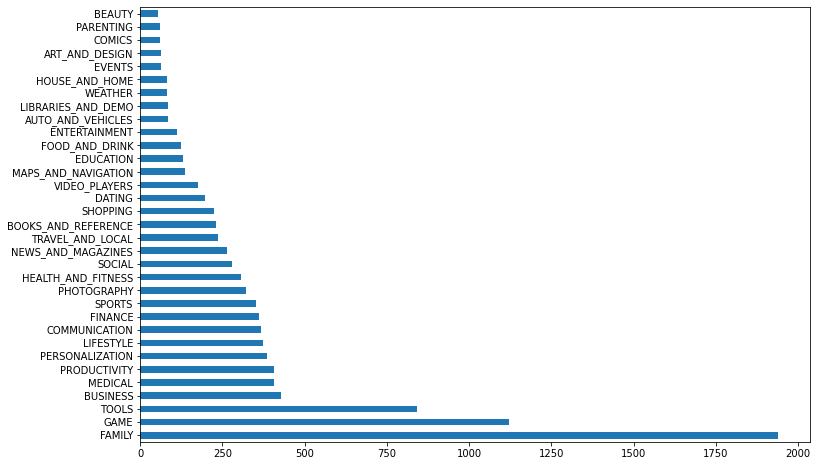

In [ ]:
gps.Category.value_counts().plot(kind='barh' ,figsize= (12,8))

By the above plot, we can find that apps with category FAMILY, GAME, TOOLS, BUSINESS, MEDICAL, PRODUCTIVITY, PERSONALIZATION, LIFESTYLE, COMMUNICATION, FINANCE, SPORTS has more than half share in the entire repository. 
x 

Key takeaways are :

  1. We have family apps category more than games and tools. Let us see how installs are for this category. By this we can find out why developers are interested in this category more and how people are receiving this catergory.
  2. We have more dating apps than food and drink, education, entertainment.
  3. Although we have a lot of e-commerce boom, we find shopping apps are less than travel and local, social, health, and fitness. It indicates the dominance of major companies in this sector that leads to less competition.
  4. Another compelling app category is medical. It has the 4th position. We can observe what kind of services provided through these apps and how much people are interested in online medical services.
  5. communication, productivity, lifestyle, health, and fitness, personalization are apps that concentrate on self-development. We can find out the no.of  installs per category apps to know the trend which people are giving importance.

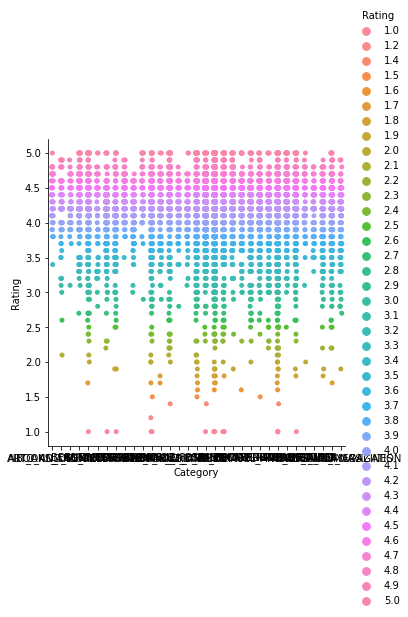

In [ ]:
sns.catplot(y='Rating',x='Category',data=gps,hue='Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating num,Category Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1,11
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1,11
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1,20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,3,3
